In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
path= '/content/eur_usd_data.csv'
df= pd.read_csv(path,encoding='Latin-1', skiprows=2,
                 names=['Date', 'Open', 'High', 'Low', 'Close', 'Change_Pips', 'Change_Percent'],
                 usecols=[0, 1, 2, 3, 4, 5, 6])
df.head()

,Date,Open,High,Low,Close,Change_Pips,Change_Percent
0,09/06/2024 00:00,1.44413,1.44421,1.44385,1.44391,-2.2,-0.02
1,09/05/2024 23:45,1.44429,1.44440,1.44405,1.44409,-2.0,-0.01
2,09/05/2024 23:30,1.44409,1.44437,1.44320,1.44429,2.0,0.01
3,09/05/2024 23:15,1.44405,1.44423,1.44320,1.44396,-0.9,-0.01
4,09/05/2024 23:00,1.44406,1.44418,1.44310,1.44405,-0.1,0.00


In [ ]:
df.shape

(934, 7)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Change_Pips,float64
Change_Percent,float64


In [ ]:
def moving_average(df):
    df['MA_12'] = df['Close'].rolling(window=12).mean()
    df['MA_40'] = df['Close'].rolling(window=40).mean()
    df['Momentum_3'] = df['Close'] - df['Close'].shift(3)
    return df

In [ ]:
df=moving_average(df)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Change_Pips,Change_Percent,Momentum_3,MA_12,MA_40
39,2024-09-05 14:15:00,1.44276,1.44318,1.44258,1.44278,0.2,0.00,-0.00058,1.443265,1.443786
40,2024-09-05 14:00:00,1.44355,1.44468,1.44232,1.44273,-8.2,-0.06,-0.00007,1.443165,1.443756
41,2024-09-05 13:45:00,1.44370,1.44402,1.44337,1.44361,-0.9,-0.01,0.00087,1.443167,1.443744
42,2024-09-05 13:30:00,1.44358,1.44394,1.44319,1.44362,0.4,0.00,0.00084,1.443157,1.443727
43,2024-09-05 13:15:00,1.44255,1.44365,1.44233,1.44359,10.4,0.07,0.00086,1.443148,1.443718


In [ ]:
features = df[['MA_12', 'MA_40', 'Momentum_3']]
target = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1.348463534444411e-07
Mean Absolute Error (MAE): 0.00029080645066126287


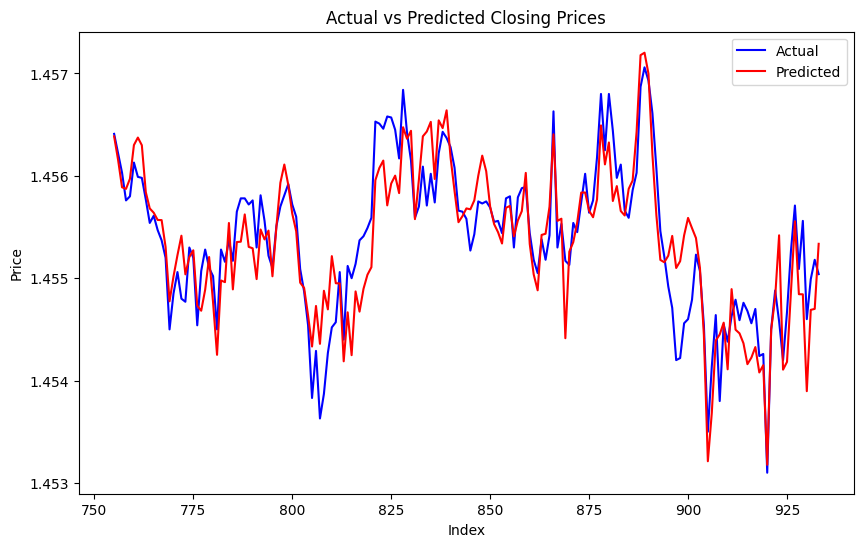

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

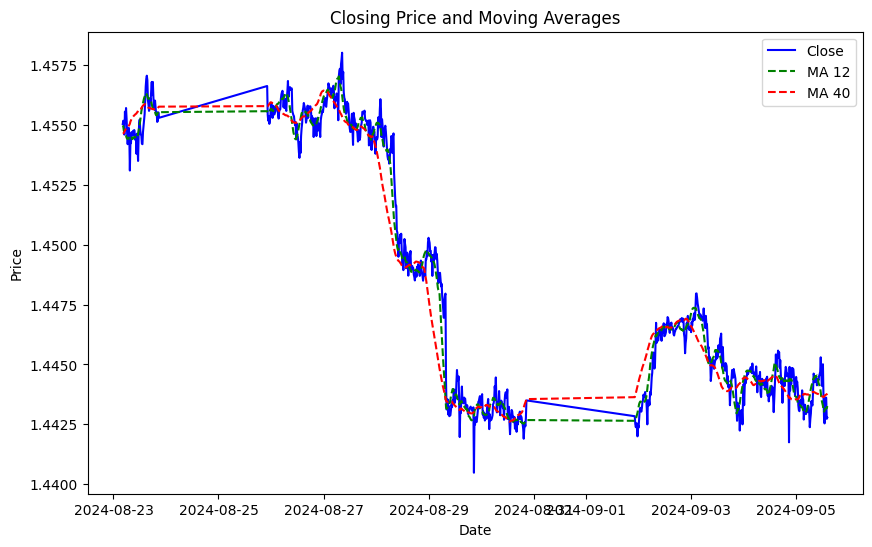

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['MA_12'], label='MA 12', color='green', linestyle='--')
plt.plot(df['Date'], df['MA_40'], label='MA 40', color='red', linestyle='--')
plt.title('Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

test on unseen data

In [ ]:
split_point = int(len(df) * 0.9)

In [ ]:
train_data = df[:split_point]
future_test = df[split_point:]

In [ ]:
X_train = train_data[['MA_12', 'MA_40', 'Momentum_3']]
y_train = train_data['Close']

In [ ]:
X_future_test = future_test_data[['MA_12', 'MA_40', 'Momentum_3']]
y_future_test = future_test_data['Close']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_future_pred1 = model.predict(X_future_test)

In [ ]:
mse_future = mean_squared_error(y_future_test, y_future_pred1)
mae_future = mean_absolute_error(y_future_test, y_future_pred1)

In [ ]:
print("Mean Squared Error (MSE) on future data:", mse_future)
print("Mean Absolute Error (MAE) on future data:", mae_future)

Mean Squared Error (MSE) on future data: 1.4192442595560897e-07
Mean Absolute Error (MAE) on future data: 0.0002913112512955044


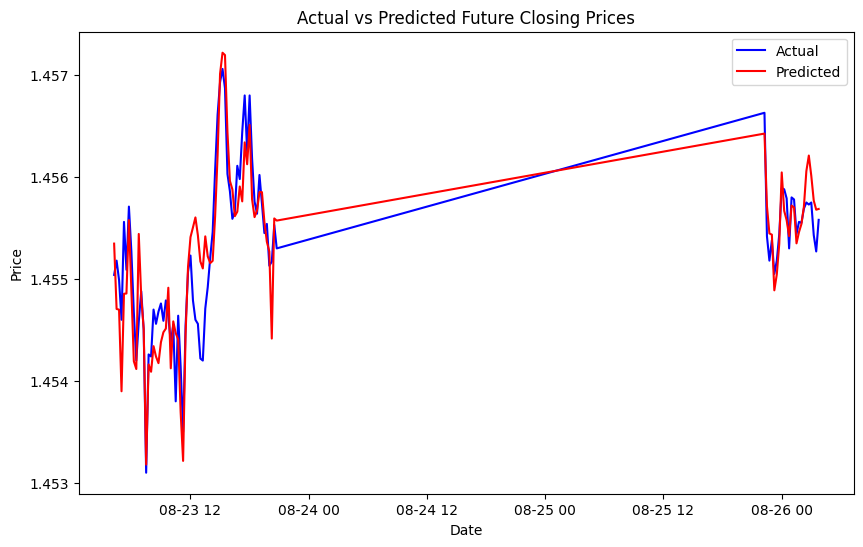

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(future_test_data['Date'], y_future_test, label='Actual', color='blue')
plt.plot(future_test_data['Date'], y_future_pred1, label='Predicted', color='red')
plt.title('Actual vs Predicted Future Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()